In [98]:
def extract_header(filename, comment_prefix, header_row_index, header_row_delimiter):
    header_lines = []

    # Open the file and extract comment lines
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith(comment_prefix):
                header_lines.append(line)

    # Get the desired header line based on header_row_index
    if header_row_index < 0:
        header_line = header_lines[header_row_index]
    else:
        header_line = header_lines[header_row_index]

    # Remove the comment prefix and split the line
    header_line = header_line.strip(comment_prefix).strip()
    header_labels = header_line.split(header_row_delimiter)

    # Remove whitespace from header labels
    header_labels = [label.strip() for label in header_labels]

    return header_labels


In [99]:
header = extract_header('Land_and_Ocean_summary.txt', comment_prefix='%', header_row_index=-1, header_row_delimiter=',')

# Make sure 'Year' is present in the header
if 'Year' not in header:
    header.insert(0, 'Year')

print(header)

['Year', 'Annual Anomaly', 'Annual Unc.', 'Five-year Anomaly', 'Five-year Unc.', 'Annual Anomaly', 'Annual Unc.', 'Five-year Anomaly', 'Five-year Unc.']


In [100]:
import pandas as pd

def read_anomaly_data_into_dataframe(filename, header, max_cols, comment_prefix):
    # Read data from the file while skipping comment lines and using specified header
    anomaly_df = pd.read_table(
        filename,
        header=None,  # We're providing the header separately
        usecols=range(max_cols),  # Limit the number of columns to read
        comment=comment_prefix,  # Ignore lines starting with comment_prefix
        delimiter=r"\s+",  # Use whitespace as the delimiter
    )

    # Set the header to the provided list of strings
    anomaly_df.columns = header[:max_cols]

    # Set the 'Year' column as the index
    anomaly_df.set_index('Year', inplace=True)

    return anomaly_df


In [101]:
anomaly_df = read_anomaly_data_into_dataframe('Land_and_Ocean_summary.txt', header, max_cols=5, comment_prefix='%')
anomaly_df


,Annual Anomaly,Annual Unc.,Five-year Anomaly,Five-year Unc.
Year,,,,
1850,-0.532,0.154,NaN,NaN
1851,-0.405,0.169,NaN,NaN
1852,-0.395,0.165,-0.423,0.121
1853,-0.418,0.158,-0.384,0.109
1854,-0.363,0.142,-0.400,0.090
...,...,...,...,...
2014,0.675,0.045,0.728,0.040
2015,0.814,0.043,0.777,0.041
2016,0.949,0.044,0.808,0.040


In [102]:
def anomaly_avg_per_decade(anomaly_df):
    # Group rows by decade and calculate the mean anomaly for each group
    anomalies_per_decade = anomaly_df.groupby(anomaly_df.index // 10 * 10)['Annual Anomaly'].mean()
    
    return anomalies_per_decade


In [103]:
anomalies_per_decade = anomaly_avg_per_decade(anomaly_df)
anomalies_per_decade


Year
1850   -0.441500
1860   -0.406900
1870   -0.297600
1880   -0.403400
1890   -0.391000
1900   -0.395700
1910   -0.402900
1920   -0.250800
1930   -0.128200
1940    0.013200
1950   -0.015800
1960   -0.015100
1970   -0.007300
1980    0.169800
1990    0.338600
2000    0.551000
2010    0.723222
Name: Annual Anomaly, dtype: float64

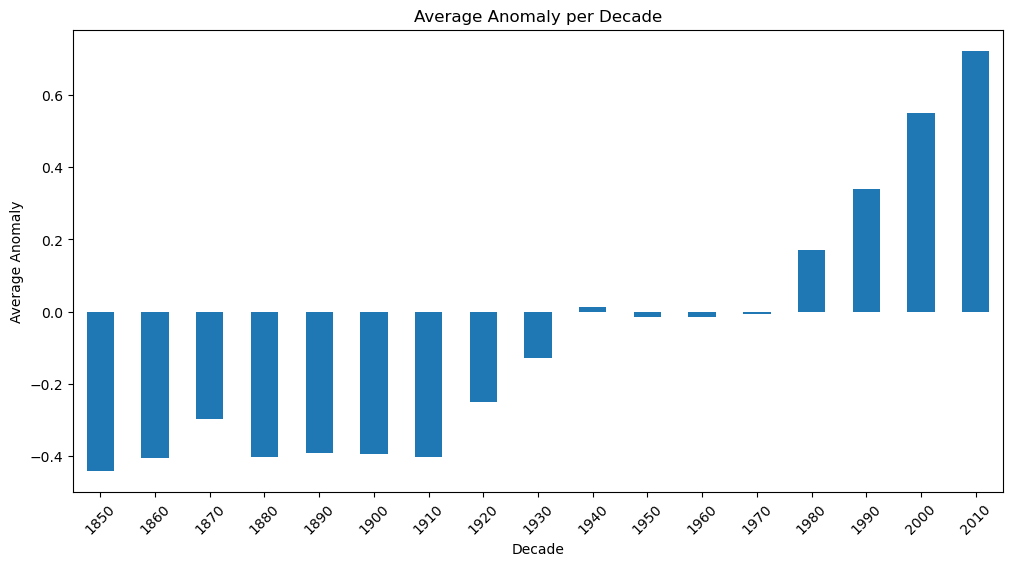

In [104]:
import matplotlib.pyplot as plt

# Plot the anomalies_per_decade Series
anomalies_per_decade.plot(kind='bar', figsize=(12, 6))
plt.title('Average Anomaly per Decade')
plt.xlabel('Decade')
plt.ylabel('Average Anomaly')
plt.xticks(rotation=45)
plt.show()
